In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('intern_train_csv.csv')

In [3]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [4]:
df.tail()

,id,time,feature
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28
79,79,2019-03-19 00:13:10,121.12


In [5]:
df = df.drop('id',axis=1)

In [6]:
df.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [7]:
df.tail()

,time,feature
75,2019-03-19 00:12:30,469.72
76,2019-03-19 00:12:40,406.79
77,2019-03-19 00:12:50,128.91
78,2019-03-19 00:13:00,85.28
79,2019-03-19 00:13:10,121.12


In [11]:
df['time'] = pd.to_datetime(df['time'])

In [12]:
df.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [13]:
df.tail()

,time,feature
75,2019-03-19 00:12:30,469.72
76,2019-03-19 00:12:40,406.79
77,2019-03-19 00:12:50,128.91
78,2019-03-19 00:13:00,85.28
79,2019-03-19 00:13:10,121.12


In [14]:
df.set_index('time',inplace=True)

In [15]:
df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [16]:
df.tail()

,feature
time,
2019-03-19 00:12:30,469.72
2019-03-19 00:12:40,406.79
2019-03-19 00:12:50,128.91
2019-03-19 00:13:00,85.28
2019-03-19 00:13:10,121.12


In [17]:
series_values = df.values

In [18]:
series_values

array([[237.97],
       [ 57.93],
       [ 90.53],
       [260.75],
       [ 49.7 ],
       [302.08],
       [152.25],
       [ 41.19],
       [ 34.61],
       [205.87],
       [166.23],
       [ 73.75],
       [282.46],
       [122.71],
       [ 32.04],
       [ 40.73],
       [ 55.06],
       [ 46.4 ],
       [ 54.46],
       [ 29.97],
       [ 40.43],
       [ 21.36],
       [ 46.59],
       [ 43.11],
       [ 55.62],
       [ 27.36],
       [ 50.94],
       [116.61],
       [ 91.8 ],
       [198.32],
       [326.76],
       [266.69],
       [205.95],
       [149.42],
       [233.22],
       [ 63.63],
       [ 89.77],
       [255.79],
       [161.08],
       [123.41],
       [239.69],
       [108.12],
       [ 94.31],
       [224.3 ],
       [184.75],
       [113.74],
       [146.06],
       [326.35],
       [126.81],
       [192.  ],
       [187.7 ],
       [194.04],
       [293.84],
       [201.54],
       [123.67],
       [260.87],
       [ 28.26],
       [131.97],
       [ 76.73

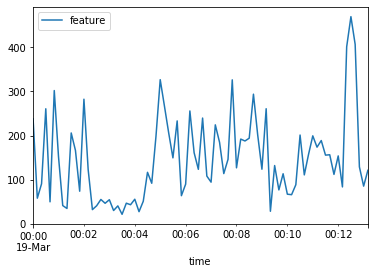

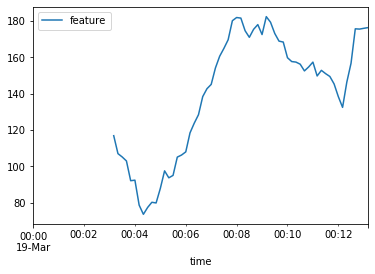

In [27]:
df.describe()
df_mean = df.rolling(window=20).mean()
df.plot()
df_mean.plot()

In [20]:
value = pd.DataFrame(series_values)

In [21]:
feature_df = pd.concat([value,value.shift(1)],axis=1)

In [22]:
feature_df.head()

,0,0
0,237.97,NaN
1,57.93,237.97
2,90.53,57.93
3,260.75,90.53
4,49.70,260.75


In [23]:
feature_df.columns = ['features','forecast_features']

In [24]:
feature_df.head()

,features,forecast_features
0,237.97,NaN
1,57.93,237.97
2,90.53,57.93
3,260.75,90.53
4,49.70,260.75


In [25]:
feature_df.tail()

,features,forecast_features
75,469.72,401.43
76,406.79,469.72
77,128.91,406.79
78,85.28,128.91
79,121.12,85.28


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
feature_test = feature_df[1:]
feature_test.head()

,features,forecast_features
1,57.93,237.97
2,90.53,57.93
3,260.75,90.53
4,49.70,260.75
5,302.08,49.70


In [29]:
feature_error = mean_squared_error(feature_test.features,feature_test.forecast_features)

In [30]:
print(feature_error)

11603.264839240506


In [31]:
np.sqrt(feature_error)

107.71845171204656

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

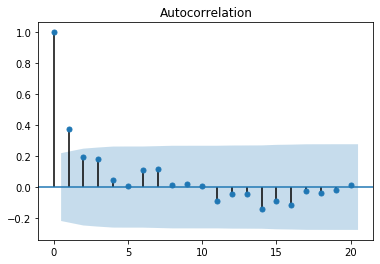

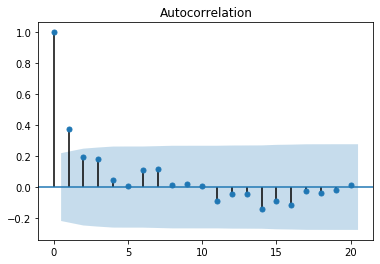

In [35]:
plot_acf(df)#q=2,3

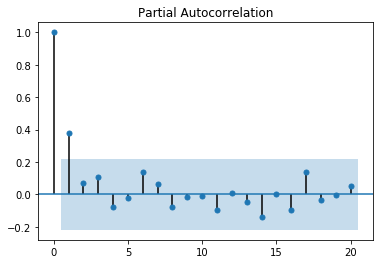

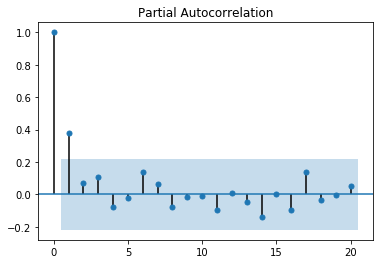

In [36]:
plot_pacf(df)#p=2,3

In [118]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df,order=(3,1,2))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


In [119]:
feature_fit = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [120]:
feature_fit.aic

948.2317818064392

In [ ]:
forecast = feature_fit.forecast(steps=40)[0]